[0. 1. 1. 0.]
[0 1 1 0]
Weights: [ 2.5026503   2.5026503  -1.84134719]
Input:[0 0], Predicted: 0.0
Input:[0 1], Predicted: 1.0
Input:[1 0], Predicted: 1.0
Input:[1 1], Predicted: 0.0


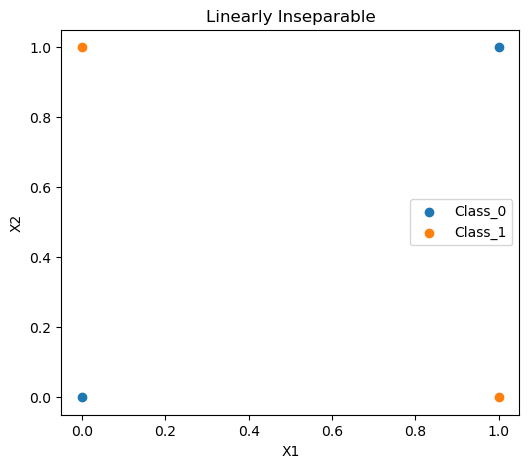

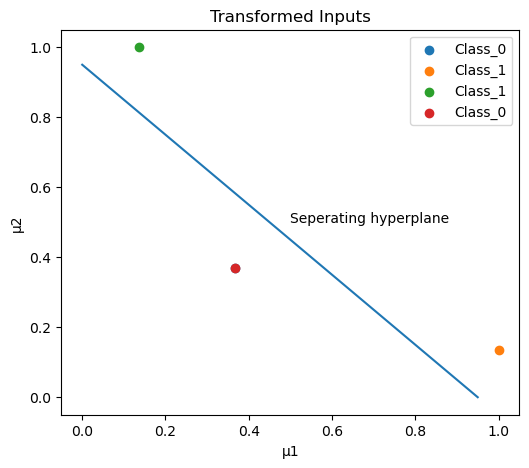

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def gaussian_rbf(x, landmark, gamma=1):
    return np.exp(-gamma * np.linalg.norm(x - landmark)**2)
def predict_matrix(point, weights):
    gaussian_rbf_0 = gaussian_rbf(np.array(point), mu1)
    gaussian_rbf_1 = gaussian_rbf(np.array(point), mu2)
    A = np.array([gaussian_rbf_0, gaussian_rbf_1, 1])
    return np.round(A.dot(weights))
x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
ys = np.array([0, 1, 1, 0])

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.scatter((x1[0], x1[3]), (x2[0], x2[3]), label="Class_0")
plt.scatter((x1[1], x1[2]), (x2[1], x2[2]), label="Class_1")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Linearly Inseparable")
plt.legend()

# centers
mu1 = np.array([0, 1])
mu2 = np.array([1, 0])

from_1 = [gaussian_rbf(i, mu1) for i in zip(x1, x2)]
from_2 = [gaussian_rbf(i, mu2) for i in zip(x1, x2)]

A = []

for i, j in zip(from_1, from_2):
    temp = []
    temp.append(i)
    temp.append(j)
    temp.append(1)
    A.append(temp)
    
A = np.array(A)
W = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(ys)
print(np.round(A.dot(W)))
print(ys)
print("Weights:",W)

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 2)
plt.scatter(from_1[0], from_2[0], label="Class_0")
plt.scatter(from_1[1], from_2[1], label="Class_1")
plt.scatter(from_1[2], from_2[2], label="Class_1")
plt.scatter(from_1[3], from_2[3], label="Class_0")
plt.plot([0, 0.95], [0.95, 0])
plt.annotate("Seperating hyperplane", xy=(0.5, 0.5), xytext=(0.5, 0.5))
plt.xlabel("µ1")
plt.ylabel("µ2")
plt.title("Transformed Inputs")
plt.legend()

print(f"Input:{np.array([0, 0])}, Predicted: {predict_matrix(np.array([0, 0]), W)}")
print(f"Input:{np.array([0, 1])}, Predicted: {predict_matrix(np.array([0, 1]), W)}")
print(f"Input:{np.array([1, 0])}, Predicted: {predict_matrix(np.array([1, 0]), W)}")
print(f"Input:{np.array([1, 1])}, Predicted: {predict_matrix(np.array([1, 1]), W)}")